In [2]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

In [3]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

Showing the pickled data:
The data  0  is :  1
The data  1  is :  2
The data  2  is :  3
The data  3  is :  4
The data  4  is :  5
The data  5  is :  6


In [4]:
data[6].nodes[75261]['hometown_1']

1

In [5]:
for node in data[6].nodes:
    node['hometown_1']

TypeError: 'int' object is not subscriptable

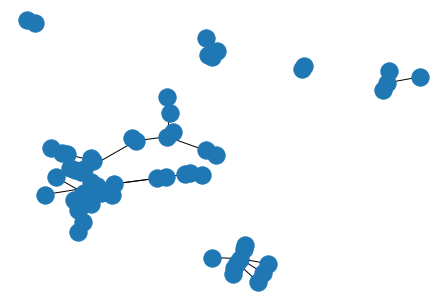

In [6]:
nx.draw(data[6])

In [7]:
data[1].nodes.data()

NodeDataView({75178: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 1, 'abortion_': 3, 'homosexual_': 3}, 30952: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 2, 'premaritalsex_': 2, 'euthanasia_': 2, 'deathpen_': 2, 'gaymarriage_': 1, 'marijuana_': 3, 'political_': 1, 'abortion_': 2, 'homosexual_': 2}, 13116: {'age_1': 1, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 3, 'deathpen_': 3, 'gaymarriage_': 3, 'marijuana_': 3, 'political_': 3, 'abortion_': 3, 'homosexual_': 1}, 62555: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 1, 'gaymarriage_': 3, 'marijuana_': 2, 'political_': 3, 'abortion_': 3, 'homosexual_': 3}, 26999: {'age_1': 2, 'hometown_1': 1, 'ethnicity_1': 2, 'gender_1': 1, 'premaritalsex_': 3, 'euthanasia_': 1, 'deathpen_': 2, 'gaymarri

In [8]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'euthanasia_': {1, 2, 3},
 'premaritalsex_': {1, 2, 3},
 'deathpen_': {1, 2, 3},
 'gaymarriage_': {1, 2, 3},
 'marijuana_': {1, 2, 3},
 'political_': {1, 2, 3},
 'abortion_': {1, 2, 3},
 'gender_1': {1, 2},
 'hometown_1': {1, 2, 3},
 'ethnicity_1': {1, 2, 3, 4},
 'homosexual_': {1, 2, 3},
 'age_1': {1, 2}}

In [9]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [10]:
attributes

{1: array([[3., 3., 3., ..., 2., 3., 1.],
        [2., 2., 2., ..., 2., 2., 1.],
        [3., 3., 3., ..., 2., 1., 1.],
        ...,
        [2., 3., 2., ..., 4., 1., 2.],
        [2., 1., 1., ..., 1., 1., 2.],
        [3., 3., 1., ..., 1., 3., 2.]]),
 2: array([[3., 1., 1., ..., 1., 1., 2.],
        [1., 1., 1., ..., 1., 1., 2.],
        [3., 3., 2., ..., 1., 3., 1.],
        ...,
        [1., 3., 2., ..., 1., 3., 1.],
        [3., 3., 3., ..., 1., 3., 1.],
        [2., 2., 1., ..., 3., 3., 1.]]),
 3: array([[3., 3., 1., 3., 1., 2., 3., 2., 2., 1., 3., 1.],
        [1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.],
        [1., 1., 1., 2., 3., 2., 1., 2., 2., 1., 1., 2.],
        [3., 3., 3., 3., 3., 3., 1., 2., 1., 3., 3., 1.],
        [3., 3., 1., 3., 2., 1., 3., 1., 1., 1., 3., 2.],
        [3., 1., 1., 3., 1., 2., 3., 2., 1., 2., 1., 1.],
        [2., 3., 1., 3., 2., 1., 1., 1., 2., 1., 3., 1.],
        [2., 3., 1., 3., 1., 3., 3., 2., 2., 1., 3., 2.],
        [1., 1., 1., 1., 1., 

In [11]:
import mca


In [90]:

ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'euthanasia_', 'premaritalsex_', 'deathpen_', 'gaymarriage_', 'marijuana_', 'political_', 'abortion_', 'homosexual_'}
{1: array([[3., 3., 3., 3., 2., 1., 3., 3.],
       [2., 2., 2., 1., 3., 1., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 1.],
       [1., 3., 1., 3., 2., 3., 3., 3.],
       [1., 3., 2., 2., 1., 2., 3., 3.],
       [3., 1., 1., 1., 1., 2., 1., 1.],
       [1., 1., 2., 2., 1., 1., 1., 2.],
       [2., 1., 2., 2., 3., 2., 2., 1.],
       [3., 3., 1., 3., 2., 2., 3., 3.],
       [1., 3., 1., 3., 3., 3., 1., 3.],
       [3., 1., 1., 1., 2., 2., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1.],
       [2., 3., 1., 3., 3., 1., 1., 3.],
       [1., 1., 1., 1., 3., 1., 1., 2.],
       [3., 3., 3., 3., 3., 3., 1., 3.],
       [3., 2., 1., 1., 2., 1., 1., 2.],
       [2., 3., 2., 1., 2., 1., 1., 1.],
       [3., 1., 3., 1., 3., 1., 1., 1.],
       [3., 2., 2., 3., 3., 3., 3., 3.],
       [3., 3., 1., 3., 3., 1., 1., 1.],
       [3., 3., 3., 3., 3., 1., 3., 3.],
       [3., 3., 

In [91]:
df = pd.DataFrame(data=ord_attributes[1], columns=ord_list_of_attributes)
print(df)

    euthanasia_  premaritalsex_  deathpen_  gaymarriage_  marijuana_  \
0           3.0             3.0        3.0           3.0         2.0   
1           2.0             2.0        2.0           1.0         3.0   
2           3.0             3.0        3.0           3.0         3.0   
3           1.0             3.0        1.0           3.0         2.0   
4           1.0             3.0        2.0           2.0         1.0   
..          ...             ...        ...           ...         ...   
93          3.0             3.0        3.0           1.0         1.0   
94          3.0             3.0        3.0           1.0         3.0   
95          2.0             3.0        2.0           1.0         1.0   
96          2.0             1.0        1.0           2.0         1.0   
97          3.0             3.0        1.0           3.0         3.0   

    political_  abortion_  homosexual_  
0          1.0        3.0          3.0  
1          1.0        2.0          2.0  
2          3

In [13]:
mca_counts = mca.MCA(df, ncols = len(attribute_values))
# print(mca_counts.fs_r(1))
print(mca_counts.L)

[0 0 0 0 0 0 0 0 0 0 0 0]


In [92]:
import prince
mca = prince.MCA(n_components = 8)

In [93]:
mca = mca.fit(df)
mca.transform(df)


,0,1,2,3,4,5,6,7
0,0.122662,-0.144814,0.030049,0.088763,0.106152,0.088766,0.029518,1.0
1,0.137279,0.185455,-0.083959,0.111534,0.089510,0.226343,-0.030785,1.0
2,0.098717,0.105076,-0.119203,-0.060902,0.074199,-0.071590,0.179417,1.0
3,-0.308344,-0.073222,-0.148650,-0.032835,0.010344,0.053014,0.055842,1.0
4,-0.100248,-0.256692,-0.190695,-0.059676,0.039009,0.145265,-0.008703,1.0
...,...,...,...,...,...,...,...,...
93,0.495209,-0.076951,0.021995,-0.106091,-0.144929,0.006302,0.025333,1.0
94,0.095791,0.097528,-0.149880,-0.117073,0.056262,0.127769,-0.100817,1.0
95,0.208901,-0.019414,-0.109212,-0.209939,-0.234257,-0.026168,0.044248,1.0
96,0.030244,0.007270,0.186365,0.026823,0.098474,-0.175362,0.074793,1.0


In [94]:
mca.eigenvalues_, mca.total_inertia_#, mca.explained_inertia_

([0.03079939519923166,
  0.023552850508398653,
  0.019639446617740842,
  0.015034991207541008,
  0.014615022971842959,
  0.013322726761363696,
  0.006528126383079681,
  4.689681828368621e-32],
 0.0)

ZeroDivisionError: float division by zero

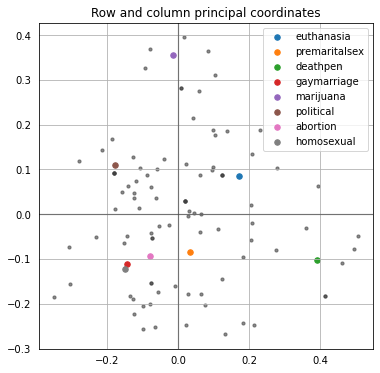

In [95]:
ax = mca.plot_coordinates(
     X=df,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

# PCA
Trying simple PCA, although it is not recommended. To do it we need to remove categorical data first. 

In [14]:

ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'euthanasia_', 'premaritalsex_', 'deathpen_', 'gaymarriage_', 'marijuana_', 'political_', 'abortion_', 'homosexual_'}
{1: array([[3., 3., 3., 3., 2., 1., 3., 3.],
       [2., 2., 2., 1., 3., 1., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 1.],
       [1., 3., 1., 3., 2., 3., 3., 3.],
       [1., 3., 2., 2., 1., 2., 3., 3.],
       [3., 1., 1., 1., 1., 2., 1., 1.],
       [1., 1., 2., 2., 1., 1., 1., 2.],
       [2., 1., 2., 2., 3., 2., 2., 1.],
       [3., 3., 1., 3., 2., 2., 3., 3.],
       [1., 3., 1., 3., 3., 3., 1., 3.],
       [3., 1., 1., 1., 2., 2., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1.],
       [2., 3., 1., 3., 3., 1., 1., 3.],
       [1., 1., 1., 1., 3., 1., 1., 2.],
       [3., 3., 3., 3., 3., 3., 1., 3.],
       [3., 2., 1., 1., 2., 1., 1., 2.],
       [2., 3., 2., 1., 2., 1., 1., 1.],
       [3., 1., 3., 1., 3., 1., 1., 1.],
       [3., 2., 2., 3., 3., 3., 3., 3.],
       [3., 3., 1., 3., 3., 1., 1., 1.],
       [3., 3., 3., 3., 3., 1., 3., 3.],
       [3., 3., 

In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 8)
pca.fit(ord_attributes[1])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.47  0.119 0.102 0.09  0.071 0.064 0.052 0.031]
[17.116  8.624  7.989  7.469  6.658  6.332  5.67   4.396]


In [123]:
pca.n_features_in_

8

In [132]:
pca.components_

array([[-0.25 , -0.418, -0.13 , -0.399, -0.271, -0.324, -0.417, -0.484],
       [ 0.468,  0.237,  0.653, -0.21 , -0.221, -0.437,  0.07 , -0.092],
       [ 0.425, -0.057, -0.074, -0.305,  0.779,  0.104, -0.136, -0.285],
       [ 0.578, -0.081, -0.528,  0.35 , -0.162, -0.376, -0.245,  0.177],
       [ 0.298, -0.585, -0.083, -0.131, -0.209,  0.179,  0.677, -0.106],
       [ 0.237,  0.499, -0.318, -0.405, -0.416,  0.476, -0.07 , -0.16 ],
       [-0.222,  0.256, -0.375, -0.464,  0.162, -0.51 ,  0.411,  0.273],
       [-0.097,  0.321, -0.154,  0.429,  0.046, -0.183,  0.333, -0.73 ]])

In [38]:
ord_list_of_attributes

{'abortion_',
 'deathpen_',
 'euthanasia_',
 'gaymarriage_',
 'homosexual_',
 'marijuana_',
 'political_',
 'premaritalsex_'}

In [47]:
np.sum(np.abs(pca.components_),0), np.sum(pca.components_,0), pca.components_[0], np.sum(pca.components_[0],0)

(array([2.575, 2.453, 2.315, 2.694, 2.265, 2.589, 2.359, 2.308]),
 array([ 1.438,  0.172, -1.008, -1.136, -0.292, -1.071,  0.623, -1.406]),
 array([-0.25 , -0.418, -0.13 , -0.399, -0.271, -0.324, -0.417, -0.484]),
 -2.6926374562917417)

# Checking correlation for PCA transformed variables

In [17]:
dcor_attributes = dict((i, 0) for i in range(1,7))

dcor_attributes = dict((j, np.array([np.sum(pca.components_*ord_attributes[j][i],1) for i in range(0,len(ord_attributes[j]))])) for j in range(1,7))

In [144]:
pca.transform(ord_attributes[1]), dcor_attributes[1];

In [134]:
X_transformed = np.dot(ord_attributes[1] - pca.mean_, pca.components_.T)
X_transformed

array([[-1.830e+00,  1.540e+00, -4.086e-01,  1.195e-01,  1.747e-01,
        -9.213e-01,  3.112e-01,  2.306e-01],
       [ 3.960e-01,  4.017e-01,  1.110e+00, -6.443e-01,  2.546e-02,
        -7.154e-01,  1.059e+00, -2.559e-01],
       [-1.780e+00,  6.278e-01,  1.149e+00, -1.149e+00,  5.346e-01,
        -6.436e-02, -1.093e+00,  1.370e+00],
       [-1.720e+00, -1.578e+00, -9.023e-01, -7.327e-01,  1.012e-01,
         1.934e-01,  4.856e-01,  3.667e-01],
       [-8.552e-01, -5.599e-02, -1.554e+00, -1.073e+00,  1.795e-01,
         2.194e-01,  9.226e-01, -7.939e-02],
       [ 1.813e+00,  6.739e-03,  6.338e-01,  5.571e-01,  1.018e+00,
         8.779e-01, -5.606e-01, -3.979e-01],
       [ 1.623e+00, -1.416e-01, -9.842e-01, -2.237e-01, -7.743e-02,
        -9.551e-01, -1.736e-01, -4.753e-01],
       [ 5.748e-01, -3.908e-01,  1.251e+00, -7.669e-01,  7.640e-01,
        -9.828e-01, -4.439e-01,  3.990e-01],
       [-1.895e+00, -2.039e-01, -1.568e-01,  7.991e-01,  5.192e-01,
         1.912e-01,  5.517e-

In [18]:
def get_transformed_attributes(agents, pca_comp = pca.components_):
    agents = np.array(agents)
#     if not hasattr(agents,  "__len__"):
#         agents = [agents]
    one_ag = False
    if hasattr(agents,  "shape"):
        if len(agents.shape) == 1:
            agents = [agents]
            one_ag = True
    
    transf = np.array([np.sum(pca.components_*agents[i],1) for i in range(0,len(agents))])
    
    if one_ag:
        transf = transf[0]
    return transf

In [145]:
get_transformed_attributes(np.ones(8))

array([-2.693,  0.469,  0.449, -0.285,  0.041, -0.156, -0.469, -0.035])

In [112]:
dcor_attributes[1].shape, get_transformed_attributes(agent1)

NameError: name 'agent1' is not defined

In [142]:
spr_cor, spr_pv = stats.spearmanr(dcor_attributes[1], axis=0)

In [143]:
np.set_printoptions(precision=3)
print(spr_cor)
print(spr_pv)

[[ 1.    -0.032 -0.089  0.036 -0.048 -0.07   0.005 -0.057]
 [-0.032  1.    -0.042  0.039  0.013  0.058 -0.02  -0.021]
 [-0.089 -0.042  1.    -0.004  0.037 -0.019  0.073 -0.047]
 [ 0.036  0.039 -0.004  1.     0.042  0.033  0.022 -0.006]
 [-0.048  0.013  0.037  0.042  1.     0.115 -0.079 -0.045]
 [-0.07   0.058 -0.019  0.033  0.115  1.    -0.04  -0.003]
 [ 0.005 -0.02   0.073  0.022 -0.079 -0.04   1.     0.136]
 [-0.057 -0.021 -0.047 -0.006 -0.045 -0.003  0.136  1.   ]]
[[0.    0.751 0.385 0.727 0.636 0.491 0.959 0.577]
 [0.751 0.    0.682 0.707 0.9   0.568 0.847 0.839]
 [0.385 0.682 0.    0.967 0.717 0.852 0.472 0.645]
 [0.727 0.707 0.967 0.    0.68  0.749 0.829 0.955]
 [0.636 0.9   0.717 0.68  0.    0.26  0.441 0.659]
 [0.491 0.568 0.852 0.749 0.26  0.    0.693 0.975]
 [0.959 0.847 0.472 0.829 0.441 0.693 0.    0.183]
 [0.577 0.839 0.645 0.955 0.659 0.975 0.183 0.   ]]


Using PCA variables show that they are decorrelated. So maybe we can use them to calculate polarities, triads etc. 
But as to calc each new attribute we get all old attributes with certain coefficients, won't the distance just be sum of coefficients for given old attribute times this attribute value?

## Max difference of new attributes

In [46]:
max_dif = abs(np.sum([3,3,3,3,3,3,3,3] * pca.components_[0]) - np.sum(np.ones(8) * pca.components_[0]))/8
min_dif = 0
max_dif

0.6731593640729356

In [49]:
max_difs = [(np.sum(np.ones(8)*3 * pca.components_[i]) - np.sum(np.ones(8) * pca.components_[i]))/8 for i in range(0, len(pca.components_))]
max_difs

[-0.6731593640729356,
 0.11716828740273731,
 0.11214982538572393,
 -0.07132349966753451,
 0.010223005331998956,
 -0.03907328540479946,
 -0.11729119229619533,
 -0.008659260277375597]

In [51]:
sum(np.abs(max_difs))

1.1490477198393008

In [53]:
max_difs2 = [(np.sum(np.abs(np.ones(8)*3 * pca.components_[i])) - np.sum(np.abs(np.ones(8) * pca.components_[i])))/8 for i in range(0, len(pca.components_))]
max_difs2, sum(max_difs2)

([0.6731593640729356,
  0.5973368021543246,
  0.5415389513500888,
  0.6239032129798618,
  0.5668296735029915,
  0.6450725898637422,
  0.6680632035555416,
  0.5734216963252284],
 4.889325493804715)

In [163]:
import itertools

vals = [1, 3]

max_dif3 = 0
max_vals = []

repeat = 8

# agents2 = [np.ones(repeat)]
# agents2 = get_transformed_attributes(agents2)
for agent1 in itertools.product(vals, repeat = repeat):
    tr_agent1 = get_transformed_attributes(agent1)
#     for agent2 in agents2: 
    for agent2 in itertools.product(vals, repeat = repeat):
        tr_agent2 = get_transformed_attributes(agent2)
        dif = calc_distance(tr_agent1, tr_agent2)
        
        if dif > max_dif3:
            max_dif3 = dif
            max_vals = [agent1, agent2]
max_dif3, max_vals

(1.9498109791002052, [(1, 3, 3, 3, 1, 1, 1, 1), (3, 1, 1, 1, 3, 3, 3, 3)])

In [ ]:
# def calc_max_dif()

In [151]:
calc_distance(get_transformed_attributes(np.ones(8)*3), get_transformed_attributes(np.ones(8)))

1.149047719839301

In [152]:
get_transformed_attributes(agent1), agent1, get_transformed_attributes(max_vals[0])

(array([-8.078,  1.406,  1.346, -0.856,  0.123, -0.469, -1.407, -0.104]),
 (3, 3, 3, 3, 3, 3, 3, 3),
 array([-6.274,  1.116,  2.032, -1.049,  1.504, -1.146, -2.466,  0.713]))

In [144]:
sum(pca.components_[0]*2)/8, len(get_transformed_attributes(np.ones(8)*3))

(-0.6731593640729359, 1)

In [164]:
def calc_distance(agent1, agent2, scale = 1):
    return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale

def calc_distances(agents, scale = 1):
    N, A = agents.shape
    
    distances = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            distances[i,j] = calc_distance(agents[i], agents[j], scale)
            distances[j,i] = distances[i,j]
    return distances


(array([0.157, 0.244, 0.487, 1.19 , 2.451, 3.277, 2.226, 0.785, 0.102,
        0.009]),
 array([0.   , 0.092, 0.183, 0.275, 0.366, 0.458, 0.549, 0.641, 0.732,
        0.824, 0.915]),
 <BarContainer object of 10 artists>)

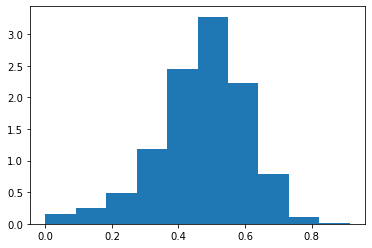

In [167]:
dists = calc_distances(dcor_attributes[1], max_dif3)

plt.hist(dists.flatten(), density=True)

In [168]:
np.where(np.max(dists) == dists), np.max(dists)

((array([53, 79, 94, 94]), array([94, 94, 53, 79])), 0.9150660566622942)

In [161]:
transf_max_vals = get_transformed_attributes(max_vals)
calc_distance(transf_max_vals[0], transf_max_vals[1])

1.1005750324299248

In [162]:
transf_max_vals, max_vals

(array([[-5.908, -0.145,  0.884, -1.361, -0.658, -1.801, -2.296, -1.219],
        [-8.078,  1.406,  1.346, -0.856,  0.123, -0.469, -1.407, -0.104]]),
 [(3, 3, 1, 3, 3, 3, 1, 1), (3, 3, 3, 3, 3, 3, 3, 3)])

In [94]:
ord_attributes[1][[53,79,94]], ord_list_of_attributes

(array([[1., 1., 1., 1., 1., 3., 1., 1.],
        [1., 1., 1., 1., 1., 3., 1., 1.],
        [3., 3., 3., 3., 3., 1., 3., 3.]]),
 {'abortion_',
  'deathpen_',
  'euthanasia_',
  'gaymarriage_',
  'homosexual_',
  'marijuana_',
  'political_',
  'premaritalsex_'})

In [174]:
(dists <= 0.5)*2-1-np.eye(dists.shape[0])

array([[ 0.,  1.,  1., ..., -1., -1.,  1.],
       [ 1.,  0., -1., ...,  1.,  1.,  1.],
       [ 1., -1.,  0., ..., -1., -1.,  1.],
       ...,
       [-1.,  1., -1., ...,  0.,  1., -1.],
       [-1.,  1., -1., ...,  1.,  0.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  0.]])

In [175]:
def calc_link_polarity2(agent1, agent2, th, attr_dif = max_dif3):
    return calc_distance(agent1, agent2, attr_dif) <= th

def calc_link_polarities2(agents, th, attr_dif = max_dif3):
    N, A = agents.shape
    
    polarities = (calc_distances(agents, attr_dif) <= th)*2 - 1 - np.eye(N)
    
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [366]:
polarities = calc_link_polarities2(dcor_attributes[1], 0.5)
pol2 = calc_link_polarities2(ord_attributes[1], 0.5, 2)
balanced_triad_density(polarities), balanced_triad_density(pol2)

(0.6168604039553967, 0.7293682937092363)

In [183]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [184]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [187]:
sem = 1
triads = get_triads(data[sem])

polarities = calc_link_polarities2(dcor_attributes[sem], 0.1)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.044444444444444446, 0.012505259835893123)

In [629]:
sem = 2
triads = get_triads(data[sem])

thetas = np.linspace(0,1,101)

bals = np.zeros(len(thetas))
all_bals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(dcor_attributes[sem], theta)
    bals[i] = balanced_triad_density_network(polarities, triads)
    all_bals[i] = balanced_triad_density(polarities)


Text(0, 0.5, 'density of balanced triads')

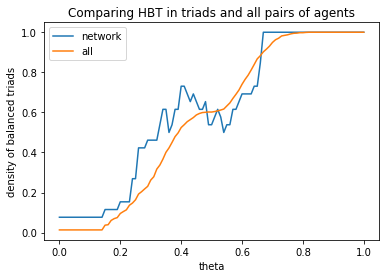

In [630]:
plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

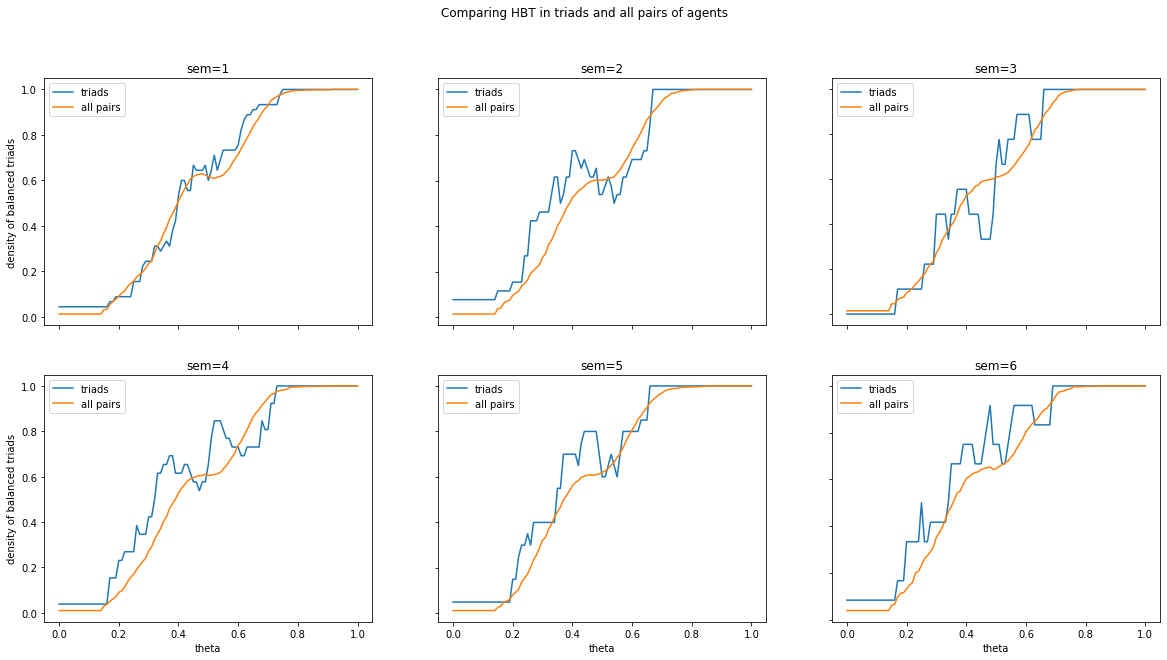

In [631]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and all pairs of agents")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        triads = get_triads(data[semm])
        
        all_bals = np.zeros(len(thetas))
        bals = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            bals[i] = balanced_triad_density_network(polarities, triads)
            all_bals[i] = balanced_triad_density(polarities)
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, thetas, all_bals)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["triads", "all pairs"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Randomizing triads in the whole network

In [345]:
def randomize_all_attributes(attr, randomized_agents = []):
    N, A = attr.shape
    
    if len(randomized_agents) == 0:
        randomized_agents = list(range(0,N))
    
    attr_rand = np.copy(attr)
    
    attr_copy = attr_rand[randomized_agents]
    
    np.random.shuffle(attr_copy)
    
    attr_rand[randomized_agents] = attr_copy
    
    return attr_rand

def randomize_attribute_sets(ord_attributes):
    rand_ord_attributes = dict((i, 0) for i in range(1,7))
    
    for sem in range(1,7):
        rand_ord_attributes[sem] = randomize_all_attributes(ord_attributes[sem])
    
    return rand_ord_attributes

def compare_bal_triads(triads, agents, th, attr_dif, M, randomized_agents = []):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents, randomized_agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands > bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks(data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = dcor_attributes[n]
        
        bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

def compare_weighted_network(net, agents, th, attr_dif, M):
    polarities = calc_link_polarities2(agents, th, attr_dif)
    U_data, pval_data = compare_weighted_links(net, polarities)
    
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    for i in range(0,M):
        agents_rand = randomize_all_attributes(agents)
        polarities_rand = calc_link_polarities2(agents_rand, th, attr_dif)
        U_rands[i], pval_rands[i] = compare_weighted_links(net, polarities_rand)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

def compare_weighted_networks(data, ord_attributes, th, attr_dif, M):
    U_rands = np.zeros(M)
    pval_rands = np.zeros(M)
    
    U_data, pval_data = compare_all_weighted_links(data, ord_attributes, th, attr_dif)
    
    for i in range(0,M):
        rand_ord_attributes = randomize_attribute_sets(ord_attributes)
        U_rands[i], pval_rands[i] = compare_all_weighted_links(data, rand_ord_attributes, th, attr_dif)
    
    pval_U = np.sum(U_rands >= U_data)
    pval_pval = np.sum(pval_rands <= pval_data)
    
    return U_rands, pval_rands, pval_U, pval_pval

In [304]:
bal_dens_rands, bal_dens, pval = compare_bal_triads(triads, dcor_attributes[sem], 0.5, 2, 100)

In [305]:
np.sum(bal_dens_rands > bal_dens), np.mean(bal_dens_rands) - bal_dens, pval

(12, -0.0868888888888889, 18)

In [346]:
sem = 1
triads = get_triads(data[sem])

thetas = np.linspace(0,1,15)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[sem], theta, max_dif3, 100)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals[i] = pval


Text(0, 0.5, 'density of balanced triads')

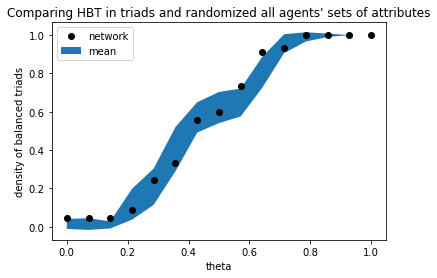

In [347]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized all agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [348]:
pvals, max_dif3

(array([ 8., 11.,  4., 53., 31., 73., 51., 53., 11.,  7., 70.,  0.,  0.,
         0.,  0.]),
 1.9498109791002052)

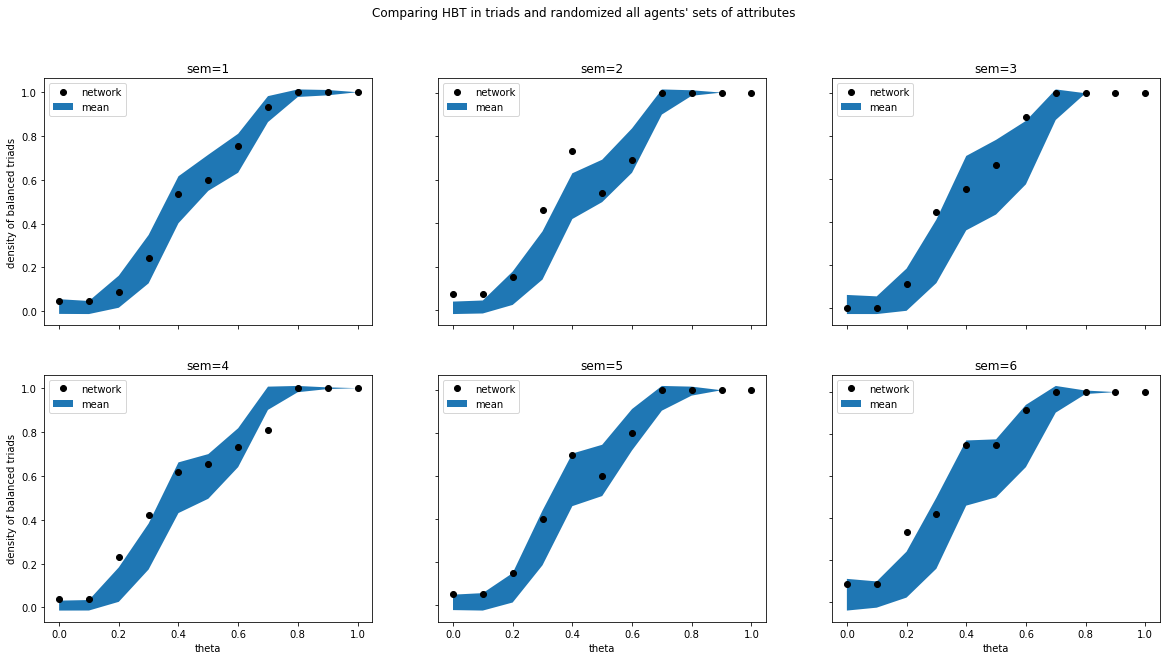

In [349]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,11)
pvals = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized all agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [350]:
pvals

{1: array([17.,  9., 38., 41., 34., 55., 29., 44.,  0.,  0.,  0.]),
 2: array([ 2.,  2., 17.,  2.,  1., 69., 62.,  0.,  0.,  0.,  0.]),
 3: array([12.,  9., 19.,  6., 34., 27.,  4.,  0.,  0.,  0.,  0.]),
 4: array([ 5.,  6.,  5.,  6., 18., 27., 41., 97.,  0.,  0.,  0.]),
 5: array([ 4.,  9., 10., 23., 13., 55., 49.,  0.,  0.,  0.,  0.]),
 6: array([ 9.,  9.,  3., 22., 14., 14., 11.,  0.,  0.,  0.,  0.])}

# Randomizing attributes only inside triads

In [280]:
sem = 1
triads = get_triads(data[sem])

In [379]:
from itertools import chain
triad_agents = np.unique(list(chain.from_iterable(triads)))
dcor_attributes[1][triad_agents];

In [354]:
sem = 2
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))

thetas = np.linspace(0,1,11)

bals = np.zeros(len(thetas))
rand_bals_mean = np.zeros(len(thetas))
rand_bals_std = np.zeros(len(thetas))
pvals_t = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[sem], theta, max_dif3, 100, triad_agents)
    rand_bals_mean[i] = np.mean(rand_bal)
    rand_bals_std[i] = np.std(rand_bal)
    bals[i] = bal
    pvals_t[i] = pval

Text(0, 0.5, 'density of balanced triads')

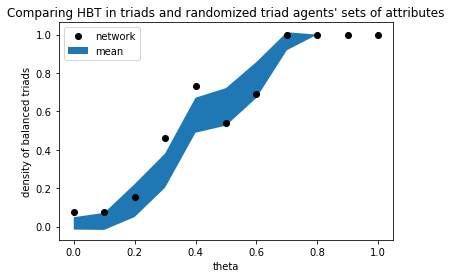

In [355]:
plt.plot(thetas, bals, 'ko')
# plt.plot(thetas, rand_bals_mean)
plt.fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
plt.legend(["network", "mean"])
plt.title("Comparing HBT in triads and randomized triad agents' sets of attributes")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [356]:
pvals_t, triad_agents

(array([ 5.,  9., 33.,  3.,  2., 74., 70.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  4,  5,  8,  9, 10, 11, 14, 15, 16, 20, 21, 22, 23, 24, 25,
        26, 27, 28, 29, 30, 31, 32, 33, 34, 38, 39, 40, 41, 44, 45, 48, 51,
        58, 66, 76]))

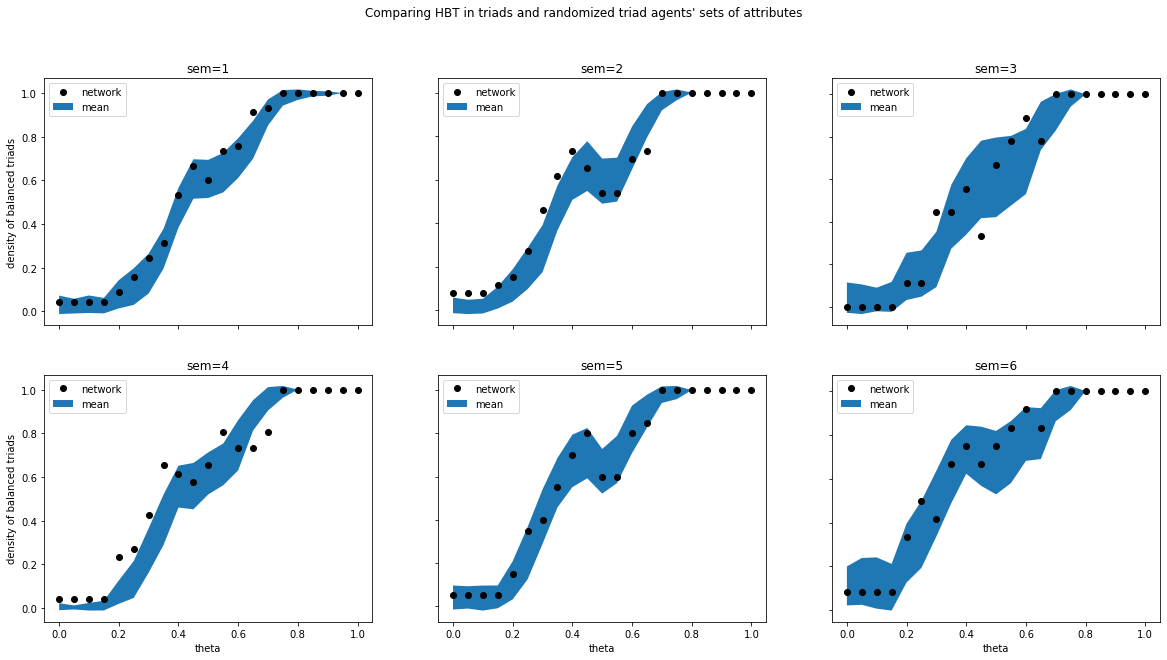

In [360]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,21)
pvals_t = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing HBT in triads and randomized triad agents' sets of attributes")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        triads = get_triads(data[semm])
        triad_agents = np.unique(list(chain.from_iterable(triads)))

        bals = np.zeros(len(thetas))
        rand_bals_mean = np.zeros(len(thetas))
        rand_bals_std = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            rand_bal, bal, pval = compare_bal_triads(triads, dcor_attributes[semm], theta, max_dif3, 100, triad_agents)
            rand_bals_mean[i] = np.mean(rand_bal)
            rand_bals_std[i] = np.std(rand_bal)
            bals[i] = bal
            pvals_t[semm][i] = pval
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, rand_bals_mean-rand_bals_std, rand_bals_mean+rand_bals_std)
        axs[a1, a2].legend(["network", "mean"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [361]:
pvals_t

{1: array([22., 16., 23., 16., 29., 24., 19., 34., 23., 18., 49., 13., 22.,
         7., 34.,  0.,  0.,  0.,  0.,  0.,  0.]),
 2: array([ 5.,  3.,  5.,  6., 19., 14.,  2.,  4.,  5., 45., 66., 68., 62.,
        93.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 3: array([30., 23., 28., 34., 39., 43.,  3., 31., 33., 88., 29., 11.,  5.,
        61.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 4: array([ 3.,  1.,  3.,  3.,  0.,  5.,  4.,  1., 23., 40., 25.,  4., 51.,
        95., 96.,  0.,  0.,  0.,  0.,  0.,  0.]),
 5: array([21., 23., 20., 24., 28., 15., 45., 47., 32., 11., 47., 68., 53.,
        67.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 6: array([44., 50., 42., 30., 22., 12., 57., 29., 25., 49., 23., 11.,  8.,
        31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])}

In [363]:
sem = 2
triads = get_triads(data[sem])
triad_agents = np.unique(list(chain.from_iterable(triads)))

In [364]:
[len(np.unique(list(chain.from_iterable(get_triads(data[sem]))))) for sem in range(1,7)]

[43, 37, 22, 41, 30, 23]

In [365]:
[len(get_triads(data[sem])) for sem in range(1,7)]

[45, 26, 9, 26, 20, 12]

# Comparing links after decorrelation

In [380]:
sem = 1
th = 0.5

polarities = calc_link_polarities2(dcor_attributes[sem], th)
pol_old = calc_link_polarities2(ord_attributes[sem], th, 2)



In [385]:
ones = np.sum(polarities == 1)/2
ones_old = np.sum(pol_old == 1)/2

ones, ones_old

(2607.0, 2933.0)

In [389]:
N = polarities.shape[0]
same = (np.sum(polarities == pol_old) - N)/2
same, same/N/(N-1)*2

(3777.0, 0.7946560067325898)

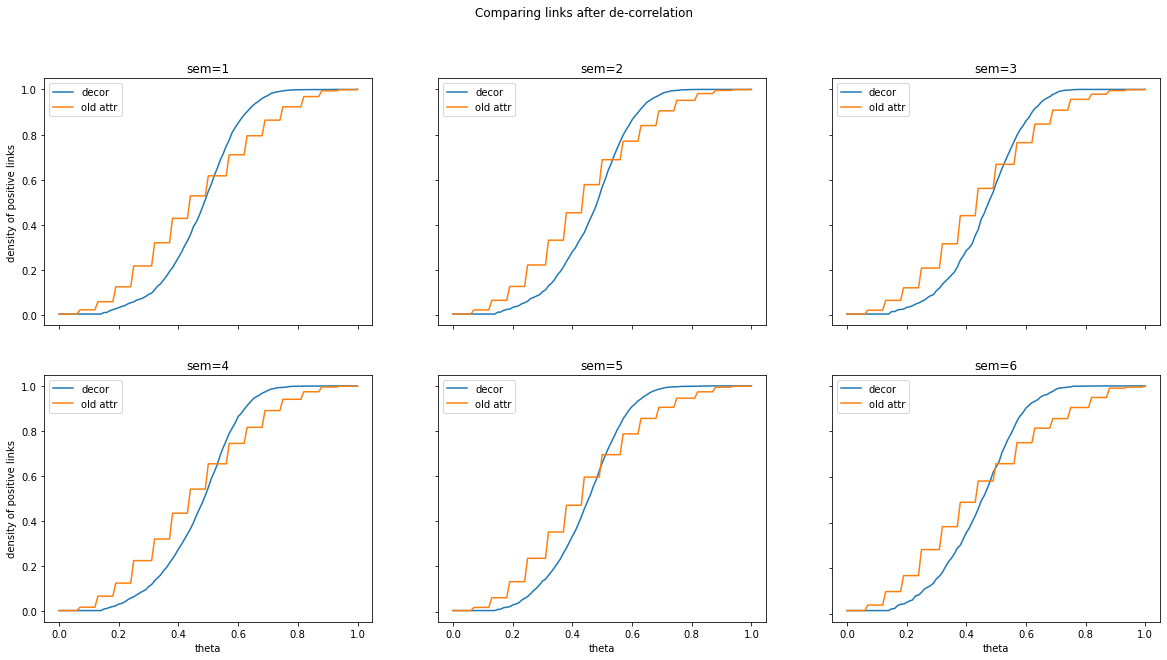

In [436]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing links after de-correlation")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        ones = np.zeros(len(thetas))
        ones_old = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            pol_old = calc_link_polarities2(ord_attributes[semm], theta, 2)
            
            N = polarities.shape[0]
            ones[i] = np.sum(polarities == 1)/2 / N/(N-1)*2
            ones_old[i] = np.sum(pol_old == 1)/2 / N/(N-1)*2
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, ones, thetas, ones_old)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["decor", "old attr"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of positive links')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

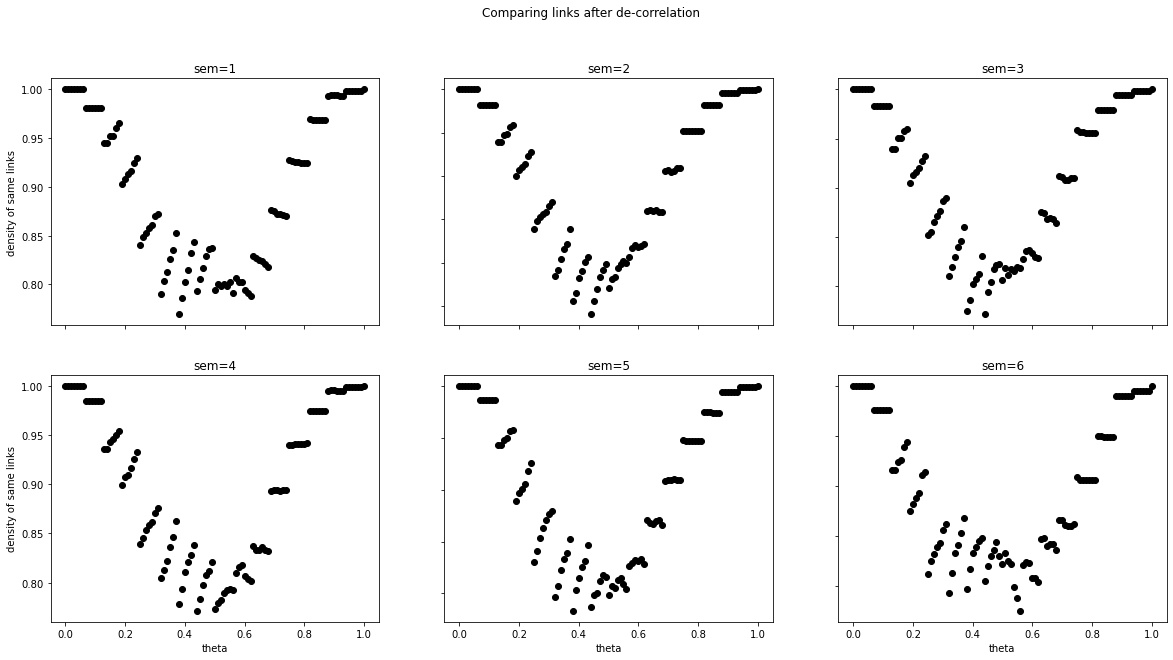

In [435]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,101)

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Comparing links after de-correlation")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        sames = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            polarities = calc_link_polarities2(dcor_attributes[semm], theta)
            pol_old = calc_link_polarities2(ord_attributes[semm], theta, 2)
            
            N = polarities.shape[0]
            sames[i] = (np.sum(polarities == pol_old) - N)/2 / N/(N-1)*2
        
        axs[a1, a2].set_title("sem=" + str(semm))
        axs[a1,a2].plot(thetas, sames, 'ko')
        # plt.plot(thetas, rand_bals_mean)

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of same links')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [425]:
data[6].degree

DegreeView({10060: 4, 85596: 10, 75261: 7, 71627: 2, 57637: 10, 66754: 6, 51552: 8, 23144: 13, 50869: 6, 25947: 6, 46160: 5, 46654: 2, 13799: 7, 86727: 4, 51722: 6, 59367: 2, 63188: 2, 68494: 6, 29914: 4, 15071: 4, 45539: 4, 46771: 5, 40997: 10, 53275: 6, 14188: 3, 17353: 2, 80058: 4, 30076: 4, 89827: 6, 37617: 2, 78911: 2, 62555: 4, 76313: 1, 50181: 1, 10841: 5, 72746: 2, 45945: 2, 26425: 2, 52067: 3, 34250: 2, 23642: 3, 66404: 6, 86352: 1, 16495: 6, 30952: 2, 19844: 1, 51597: 3, 52635: 2, 88175: 2, 75468: 2, 46021: 4, 66052: 2, 18420: 1, 68633: 2, 53884: 1, 32174: 1, 62560: 2, 25544: 5, 18344: 3, 39783: 2, 49597: 2, 44520: 2, 31583: 1})

In [405]:
A = nx.adjacency_matrix(data[6]).todense()

In [406]:
data[6].nodes

NodeView((10060, 85596, 75261, 71627, 57637, 66754, 51552, 23144, 50869, 25947, 46160, 46654, 13799, 86727, 51722, 59367, 63188, 68494, 29914, 15071, 45539, 46771, 40997, 53275, 14188, 17353, 80058, 30076, 89827, 37617, 78911, 62555, 76313, 50181, 10841, 72746, 45945, 26425, 52067, 34250, 23642, 66404, 86352, 16495, 30952, 19844, 51597, 52635, 88175, 75468, 46021, 66052, 18420, 68633, 53884, 32174, 62560, 25544, 18344, 39783, 49597, 44520, 31583))

In [430]:
degrees2 = [np.sum(A[:,i]>0) for i in range(0,len(data[6].nodes))]

In [437]:
len(degrees2), len(data[6].nodes)

(63, 63)

In [440]:
np.sort(data[6].nodes)

array([10060, 10841, 13799, 14188, 15071, 16495, 17353, 18344, 18420,
       19844, 23144, 23642, 25544, 25947, 26425, 29914, 30076, 30952,
       31583, 32174, 34250, 37617, 39783, 40997, 44520, 45539, 45945,
       46021, 46160, 46654, 46771, 49597, 50181, 50869, 51552, 51597,
       51722, 52067, 52635, 53275, 53884, 57637, 59367, 62555, 62560,
       63188, 66052, 66404, 66754, 68494, 68633, 71627, 72746, 75261,
       75468, 76313, 78911, 80058, 85596, 86352, 86727, 88175, 89827])

In [463]:
np.sum(A[0,:]>0), np.sum(A[0,:])

(1, 652)

In [452]:
list(data[6].neighbors(10060))

[51722, 85596]

In [453]:
data[6][10060]

AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}}))

In [456]:
list(data[6].neighbors(31583)), data[6][31583]

([88175], AtlasView(UnionAtlas({}, {88175: {'weight': 1}})))

What we can see above is that this is in fact a directed network! But adjacency matrix is undirected. 

I will check whether the order of nodes is good. 

In [466]:
np.sum(A[-3,:]>0), data[6][49597]

(1, AtlasView(UnionAtlas({39783: {'weight': 6}}, {39783: {'weight': 5}})))

In [458]:
nx.is_directed(data[6])

False

In [460]:
list(nx.enumerate_all_cliques(data[6]))

[[10060],
 [85596],
 [75261],
 [71627],
 [57637],
 [66754],
 [51552],
 [23144],
 [50869],
 [25947],
 [46160],
 [46654],
 [13799],
 [86727],
 [51722],
 [59367],
 [63188],
 [68494],
 [29914],
 [15071],
 [45539],
 [46771],
 [40997],
 [53275],
 [14188],
 [17353],
 [80058],
 [30076],
 [89827],
 [37617],
 [78911],
 [62555],
 [76313],
 [50181],
 [10841],
 [72746],
 [45945],
 [26425],
 [52067],
 [34250],
 [23642],
 [66404],
 [86352],
 [16495],
 [30952],
 [19844],
 [51597],
 [52635],
 [88175],
 [75468],
 [46021],
 [66052],
 [18420],
 [68633],
 [53884],
 [32174],
 [62560],
 [25544],
 [18344],
 [39783],
 [49597],
 [44520],
 [31583],
 [10060, 85596],
 [10060, 51722],
 [85596, 50869],
 [85596, 51722],
 [85596, 68494],
 [85596, 37617],
 [75261, 71627],
 [75261, 46654],
 [75261, 66404],
 [75261, 62560],
 [57637, 66754],
 [57637, 51552],
 [57637, 23144],
 [57637, 89827],
 [57637, 25544],
 [66754, 51552],
 [66754, 89827],
 [51552, 23144],
 [51552, 89827],
 [23144, 50869],
 [23144, 46160],
 [23144, 2642

In [468]:
get_triads(data[6])

[(0, 1, 14),
 (4, 5, 6),
 (4, 5, 28),
 (4, 6, 7),
 (4, 6, 28),
 (5, 6, 28),
 (7, 10, 40),
 (12, 13, 20),
 (18, 19, 21),
 (22, 23, 34),
 (23, 34, 53),
 (26, 27, 41)]

OK, the order of nodes is correct. 

Now let's check how weights in adjacency matrix are correlated with the weights in nodes' attributes

In [476]:
data[6][10060], A[0,:]

(AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}})),
 matrix([[  0, 638,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]]))

Adjacency matrix is symmetric. 

However, the weights are neither the maximum nor minimum weight of a weight i->j and j->i. 
Above is the example it is not the maximum (638, 844 -> 638). 
Also (14, 1 -> 14)


In [480]:
data[6][57637], A[4,:]

(AtlasView(UnionAtlas({66754: {'weight': 123}, 51552: {'weight': 19}, 23144: {'weight': 86}, 89827: {'weight': 6}, 25544: {'weight': 6}}, {23144: {'weight': 72}, 66754: {'weight': 106}, 51552: {'weight': 13}, 89827: {'weight': 2}, 25544: {'weight': 8}})),
 matrix([[  0,   0,   0,   0,   0, 123,  19,  86,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0]]))

It seems, that which value of weight is given is related to which node was entered first. 

In [491]:
data_nodes = list(data[6].nodes)
data[6][data_nodes[0]][85596], data[6][data_nodes[0]]

({'weight': 638},
 AtlasView(UnionAtlas({85596: {'weight': 638}, 51722: {'weight': 14}}, {85596: {'weight': 844}, 51722: {'weight': 16}})))

In [493]:
data[6][data_nodes[0]][85596]['weight']

638

In [577]:
def create_directed_adj_mat(net):
    A_undir = nx.adjacency_matrix(net).todense()
    A_dir = np.zeros(A_undir.shape, dtype=int)
    
    data_nodes = list(net.nodes)
    
    for node_ind, node in enumerate(data_nodes):
        for neigh in net[data_nodes[node_ind]]:
            try:
                neigh_ind = np.where(np.array(data_nodes) == neigh)[0][0]
            except KeyError:
                print(neigh)
                print(np.array(data_nodes) == neigh)
                print(data_nodes)
                print(net[data_nodes[node_ind]])
            try:
                A_dir[node_ind,neigh_ind] = net[data_nodes[node_ind]][neigh]['weight']
            except KeyError:
                print(node_ind, neigh_ind)
                print(net[data_nodes[node_ind]])
                print(net[data_nodes[node_ind]][neigh_ind])
                print(net[data_nodes[node_ind]][neigh_ind]['weight'])
    return A_dir, A_undir

"""
This can find also directed triads. 
"""
def get_triads_from_adj_mat(A):
    N = A.shape[0]
    
    triads = dict()
    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] == 0:
                continue
            for k in range(j+1,N):
                if A[j,k] > 0 and A[k,i] > 0:
                    triads[(i,j,k)] = (A[i,j], A[j,k], A[k, i])
    
    for i in range(0,N):
        for j in range(i+1,N):
            if A[j,i] == 0:
                continue
            for k in range(j+1,N):
                if A[k,j] > 0 and A[i,k] > 0:
                    triads[(k,j,i)] = (A[k,j], A[j,i], A[i,k])
    return triads

def find_th_polarity_change(attr, agent1, agent2, sem, dif_max = max_dif3):
    thresholds = np.linspace(0,1,101)
    
    beg_polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], 0, dif_max)
    
    for th in thresholds:
        polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], th, dif_max)
        if beg_polarity != polarity:
            break
        
    return th
    

In [558]:
A_dir, A_undir = create_directed_adj_mat(data[6])

In [559]:
triads = get_triads_from_adj_mat(A_dir)
triads

{(0, 1, 14): (638, 123, 16),
 (4, 5, 6): (123, 13, 13),
 (4, 5, 28): (123, 39, 2),
 (4, 6, 7): (19, 9, 72),
 (4, 6, 28): (19, 4, 2),
 (5, 6, 28): (13, 4, 25),
 (7, 10, 40): (1, 25, 1),
 (12, 13, 20): (16, 329, 7784),
 (18, 19, 21): (10, 2, 27),
 (22, 23, 34): (37, 18, 1),
 (23, 34, 53): (18, 4, 2),
 (26, 27, 41): (2, 115, 8),
 (14, 1, 0): (98, 844, 14),
 (6, 5, 4): (11, 106, 19),
 (28, 5, 4): (25, 106, 6),
 (7, 6, 4): (11, 13, 86),
 (28, 6, 4): (5, 13, 6),
 (28, 6, 5): (5, 11, 39),
 (40, 10, 7): (33, 1, 1),
 (20, 13, 12): (329, 10, 8604),
 (21, 19, 18): (7, 7, 21),
 (34, 23, 22): (10, 36, 1),
 (53, 34, 23): (4, 10, 2),
 (41, 27, 26): (101, 2, 6)}

In [562]:
sem = 6
th = 0.4

polarities = calc_link_polarities2(dcor_attributes[sem], th)
pol_old = calc_link_polarities2(ord_attributes[sem], th, 2)

In [569]:
polarities[12,13]

1.0

In [614]:
agent1 = 7
agent2 = 40
agent3 = 10
find_th_polarity_change(dcor_attributes, agent1, agent2, sem), find_th_polarity_change(ord_attributes, agent1, agent2, sem, 2)

(0.46, 0.25)

In [611]:
sem = 6
attr = dcor_attributes
agent1 = 40
agent2= 10
beg_polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], 0)
thresholds = np.linspace(0,1,101)
for th in thresholds:
    polarity = calc_link_polarity2(attr[sem][agent1], attr[sem][agent2], th)
    if beg_polarity != polarity:
        print(th)
        break

0.56


In [605]:
dcor_attributes[sem][agent1], dcor_attributes[sem][agent2]

(array([-3.092,  0.259,  0.143,  0.064, -0.09 , -0.561, -0.934,  0.395]),
 array([-7.171,  0.974,  1.286,  0.951, -0.07 , -0.785,  0.362,  0.571]))

In [616]:
agent1 = 7
agent2 = 40
agent3 = 10
calc_distance(dcor_attributes[sem][agent1], dcor_attributes[sem][agent2], max_dif3), calc_distance(dcor_attributes[sem][agent1], dcor_attributes[sem][agent3], max_dif3),  calc_distance(dcor_attributes[sem][agent3], dcor_attributes[sem][agent2], max_dif3)

(0.45101236526255084, 0.5163075877959884, 0.5576475905238091)

Czemu losujemy tylko po agentach, którzy tworzą triady? Czy to ma sens?

Agenci, którzy nie tworzą triad, może mają połączenia z innymi agentami, ale ich nie widzimy. Stąd jest sens ich nie brać. 

Ale jaki sens ma, że bierzemy jedną triadę ABC i triadę DEF, które są oderwane od reszty sieci i mieszamy agentów? 

Wychodzi, że atrybuty nie mają takiego znaczenia, jeśli chodzi o otrzymanie odpowiedniej równowagi. Ewentualnie, ja źle na nie patrzę. 